In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver
load_dotenv()


True

In [7]:
model = ChatOpenAI()

In [8]:
class Jokestate(TypedDict):
    topic: str
    joke: str
    explantion: str
    

In [9]:
def genrate_joke(state: Jokestate):
    prompt = f'generate a joke on the topic {state["topic"]}'
    response = model.invoke(prompt).content
    return {'joke': response}

def genrate_joke_explaination(state: Jokestate):
    prompt = f"Write an explanation for the joke - {state["joke"]} "
    response = model.invoke(prompt)
    return {'explantion': response}


In [10]:
graph = StateGraph(Jokestate)
graph.add_node('genrate_joke', genrate_joke)
graph.add_node('genrate_joke_explaination', genrate_joke_explaination)

graph.add_edge(START, 'genrate_joke')
graph.add_edge('genrate_joke','genrate_joke_explaination')
graph.add_edge('genrate_joke_explaination', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)



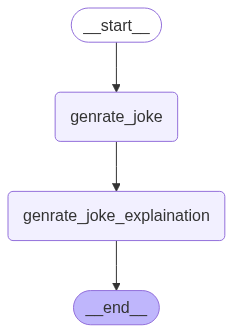

In [11]:
workflow

In [12]:
CONFIG = {'configurable': {"thread_id": "1"}}
workflow.invoke({'topic': 'pizza'}, config=CONFIG)

{'topic': 'pizza',
 'joke': 'Why did the pizza go to the party? Because it wanted to get a slice of the action!',
 'explantion': AIMessage(content='This joke plays on the double meaning of the phrase "slice of the action." In one sense, it refers to a piece of the fun and excitement at the party. In another sense, it literally means a slice of pizza, which is a popular party food. So, the joke suggests that the pizza went to the party because it wanted to have some fun and excitement, but also because it wanted to be eaten and enjoyed by the party-goers.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 35, 'total_tokens': 126, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-C6uey5hcqrdL

In [13]:
workflow.get_state(CONFIG)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the party? Because it wanted to get a slice of the action!', 'explantion': AIMessage(content='This joke plays on the double meaning of the phrase "slice of the action." In one sense, it refers to a piece of the fun and excitement at the party. In another sense, it literally means a slice of pizza, which is a popular party food. So, the joke suggests that the pizza went to the party because it wanted to have some fun and excitement, but also because it wanted to be eaten and enjoyed by the party-goers.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 35, 'total_tokens': 126, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'ch